## Final project: Pauli twirling
### Solutions

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np

### Task 1 (7p)

Algebraically compute the resulting channel after applying twirling on:

1) Bit-flip channel
$$ \Lambda_d (\rho) = (1-p) I \rho I + p (X \rho X)$$
2) Coherent rotation
$$ \Lambda_r (\rho) = \cos^2{\left(\frac{\theta}{2}\right)} I \rho I  + \sin^2{\left(\frac{\theta}{2}\right)} X \rho X + \frac{i}{2} (\sin{(\theta)} I \rho X - \sin{(\theta)} X \rho I)$$
3) Amplitude damping channel
$$ \Lambda_a (\rho) = A_0 \rho A_0^\dagger + A_1 \rho A_1^\dagger$$
with Kraus operators $A_0 = \frac{(1+\sqrt{1-p})}{2} I  + \frac{(1-\sqrt{1-p})}{2} Z$ and $A_1 = \frac{\sqrt{p}}{2} (X + iY)$.

Write the resulting channels as Pauli channels.

#### Solution

Let us first compute the action of the $\mathcal{P}$ channels on the Pauli operators.
\begin{align*}
\mathcal{P}_i (I) &= I \\
\mathcal{P}_0 (\sigma_i) &= I \sigma_i I = \sigma_i \\
\mathcal{P}_1 (X) &= XXX = X \\
\mathcal{P}_2 (X) &= YXY = -X \\
\mathcal{P}_3 (X) &= ZXZ = -X \\
\end{align*}
1. Bit-flip channel.
\begin{align*}
\widetilde{\Lambda}_d (\rho) &= \frac{1}{4}\sum_{i=0}^3 \mathcal{P}_i \Lambda_d \mathcal{P}^\dagger_i \rho \\ 
&= \frac{1}{4} \left(\sum_{i=0}^3 {\left[(1-p) \mathcal{P}_i I \rho I \mathcal{P}_i^\dagger + p (\mathcal{P}_i X \rho X \mathcal{P}_i^\dagger )\right]} \right) \\
&= \frac{1}{4} \left(\sum_{i=0}^3 {\left[(1-p) \mathcal{P}_i (I) \rho \mathcal{P}_i^\dagger (I) + p (\mathcal{P}_i (X) \rho \mathcal{P}_i^\dagger (X))\right]} \right) \\
&= \frac{1}{4} \left(4 (1-p) \rho + 4 p (X \rho X) \right) \\
&= \Lambda_d(\rho) \\
\end{align*}
The channel is unmodified by twirling.


2. Coherent rotation.
From the above calculation, we noticed that both the $I\rho I$ and $X \rho X$ terms stay invariant under twirling. Also, $\mathcal{P}$ and $\mathcal{P}^\dagger$ perform the same action, therefore we will only use $\mathcal{P}$.
\begin{align*}
\widetilde{\Lambda}_r (\rho) &= \cos^2{\left(\frac{\theta}{2}\right)} I \rho I + \sin^2{\left(\frac{\theta}{2}\right)} X \rho X + \frac{1}{4}\sum_{i=0}^3 \left[\frac{i}{2} (\sin{(\theta)} \mathcal{P}_i (I) \rho \mathcal{P}_i (X) - \sin{(\theta)} \mathcal{P}_i (X) \rho \mathcal{P}_i (I))\right].
\end{align*}
Let us focus on the last term with the sum.
\begin{align*}
\frac{1}{4}\sum_{i=0}^3 \left[\frac{i}{2} (\sin{(\theta)} \mathcal{P}_i (I) \rho \mathcal{P}_i (X) - \sin{(\theta)} \mathcal{P}_i (X) \rho \mathcal{P}_i (I))\right] &= \frac{1}{4}\sum_{i=0}^3 \left[\frac{i}{2} (\sin{(\theta)} I \rho \mathcal{P}_i (X) - \sin{(\theta)} \mathcal{P}_i (X) \rho I)\right] \\
&= \frac{1}{4}\left(2\left[\frac{i}{2} (\sin{(\theta)} I \rho X - \sin{(\theta)} X \rho I)\right] - 2\left[\frac{i}{2} (\sin{(\theta)} I \rho X - \sin{(\theta)} X \rho I)\right]\right) \\
&= 0.
\end{align*}
This means that the twirled channel is simply
\begin{align*}
\widetilde{\Lambda}_r (\rho) &= \cos^2{\left(\frac{\theta}{2}\right)} I \rho I + \sin^2{\left(\frac{\theta}{2}\right)} X \rho X
\end{align*}
and is in the form of a Pauli channel.


3. Amplitude damping channel. Let us compute some additional actions of the $\mathcal{P}$ channel.
\begin{align*}
\mathcal{P}_1 (Y) &= XYX = -Y \\
\mathcal{P}_2 (Y) &= YYY = Y \\
\mathcal{P}_3 (Y) &= ZYZ = -Y \\
\mathcal{P}_1 (Z) &= XZX = -Z \\
\mathcal{P}_2 (Z) &= YZY = -Z \\
\mathcal{P}_3 (Z) &= ZZZ = Z \\
\end{align*}
Let us now compute the twirled amplitude damping channel.
\begin{align*}
\widetilde{\Lambda}_a (\rho) &= \frac{1}{4}\sum_{i=0}^3 {\left[\mathcal{P}_i(A_0) \rho \mathcal{P}_i(A_0^\dagger) + \mathcal{P}_i(A_1) \rho \mathcal{P}_i(A_1^\dagger)\right]}.
\end{align*}
First, we compute the twirls for the $A_0$ Kraus operators.
\begin{align*}
\mathcal{P}_i(A_0) &= \frac{(1+\sqrt{1-p})}{2} \mathcal{P}_i(I)  + \frac{(1-\sqrt{1-p})}{2} \mathcal{P}_i(Z) \\
&= \frac{(1+\sqrt{1-p})}{2} I  + \frac{(1-\sqrt{1-p})}{2} \mathcal{P}_i(Z) \\
&= \mathcal{P}_i(A_0^\dagger)
\end{align*}
The second term is negative for $i=1,2$. If we substitute this result into the expression, we get
\begin{align*}
\frac{1}{4}\sum_{i=0}^3 {\left[\mathcal{P}_i(A_0) \rho \mathcal{P}_i(A_0^\dagger)\right]} &= \frac{1}{4} \left((1+\sqrt{1-p})^2 I \rho I + (1-\sqrt{1-p})^2 Z \rho Z + \frac{(1+\sqrt{1-p})(1-\sqrt{1-p})}{4} (2 (I \rho Z  + Z \rho I) - 2(I \rho Z  + Z \rho I)) \right) \\
&= \frac{1}{4} \left((1+\sqrt{1-p})^2 I \rho I + (1-\sqrt{1-p})^2 Z \rho Z\right) \\
&= \frac{1}{4} \left((1+\sqrt{1-p})^2 I \rho I + (1-\sqrt{1-p})^2 Z \rho Z\right) \\
\end{align*}
Now, let us compute the twirls for the $A_1$ Kraus operators.
\begin{align*}
\mathcal{P}_i(A_1) &= {\frac{\sqrt{p}}{2} (\mathcal{P}_i(X) + i \mathcal{P}_i(Y))} \\
&= (\mathcal{P}_i(A_1^\dagger))^\dagger
\end{align*}
We substitute this into the expression to get
\begin{align*}
\frac{1}{4}\sum_{i=0}^3 {\left[\mathcal{P}_i(A_1) \rho \mathcal{P}_i(A_1^\dagger)\right]} &= \frac{1}{4}\sum_{i=0}^3\frac{p}{4} { (\mathcal{P}_i(X) + i \mathcal{P}_i(Y))}  \rho { (\mathcal{P}_i(X) - i \mathcal{P}_i(Y))} \\
&= \frac{1}{4}\frac{p}{4} {(4X\rho X + 4Y\rho Y  - 2(i X\rho Y + i Y\rho X) + 2(i X\rho Y + i Y\rho X))} \\
&= \frac{p}{4} (X\rho X + Y\rho Y).\\
\end{align*}
Finally, let us sum the two results to obtain the twirled amplitude damping channel.
\begin{align*}
\widetilde{\Lambda}_a (\rho) &= \frac{1}{4} \left((1+\sqrt{1-p})^2 I \rho I + pX\rho X + pY\rho Y+ (1-\sqrt{1-p})^2 Z \rho Z\right).
\end{align*}
We see that the twirled channel is in the form of a Pauli channel and all the mixed terms $\sigma_i \rho \sigma_j$ with $i\neq j$ of the noise channel are eliminated.

### Task 2 (8p)

Write custom experiment and analysis classes using the qiskit-experiments framework for extracting density matrices after twirling noise channels using state tomography.
The experiment class should accept at least one circuit with a noise channel as input and the analysis class should return a density matrix as output.

There are many possible ways of implementing this, but to give you an idea where to start, we provide you with a template below. Your experiment class could inherit from `BaseExperiment` or `TomographyExperiment` and implement the `__init__` and `circuit` methods to produce the circuits necessary for Pauli twirling. Your analysis class could inherit from `BaseAnalysis` and implement the `_run_analysis` method to average the results over different twirls obtained from the experiment. You can use the instructions on the [qiskit-experiments Documentation](https://qiskit.org/ecosystem/experiments/tutorials/custom_experiment.html) for help. Qiskit-experiments is fully open source, so looking at the source code can help as well.

#### Solution

In [1]:
from qiskit import QuantumCircuit
from copy import deepcopy
from itertools import chain
from typing import List, Optional, Sequence
from qiskit.providers.backend import Backend
from qiskit_experiments.framework import Options
from qiskit_experiments.library.tomography import TomographyExperiment, StateTomographyAnalysis

from typing import List
from qiskit_experiments.framework import (
    BaseAnalysis,
    Options,
    ExperimentData,
    AnalysisResultData
)

class TwirledStateTomographyAnalysis(BaseAnalysis):
    """Custom analysis class template."""

    @classmethod
    def _default_options(cls) -> Options:
        """Set default analysis options."""

        options = super()._default_options()
        return options

    def _add_dicts(self, d1, d2):
        """Method to add two dictionaries.
        """        
        dtot = {key: 0 for key in set(chain(d1.keys(), d2.keys()))}
        for key, val in chain(d1.items(), d2.items()):
            dtot[key] += val
        return dtot

    def _run_analysis(
        self,
        experiment_data: ExperimentData
    ) -> List[AnalysisResultData]:
        """Run the analysis."""

        # Dictionary for obtaining qiskit's measurement basis indexing
        meas_keys = {'Z': 0, 'X': 1, 'Y': 2}
        new_res = []
        # Average the results obtained for each measurement basis over the twirls
        for meas in ['Z', 'X', 'Y']:
            # Create new data object that we can give to StateTomographyAnalysis
            new_res_object = deepcopy(experiment_data.data()[0])
            del new_res_object['job_id']
            del new_res_object['meas_level']
            del new_res_object['metadata']['twirl']
            # Add 'm_idx' for StateTomographyAnalysis and 'twirled' for us to keep track
            new_res_object['metadata'].update({'twirled': True, 'm_idx': [meas_keys[meas]]})

            # Average the counts dictionaries
            total_shots = 0
            new_counts_dict = {}
            for twirl_res in filter(lambda x: x['metadata']['m_idx'] == meas, experiment_data.data()):
                new_counts_dict = self._add_dicts(new_counts_dict, twirl_res['counts'])
                total_shots += twirl_res['shots']
            new_res_object['counts'] = new_counts_dict
            new_res_object['shots'] = total_shots
            new_res.append(new_res_object)

        # Replace the data in experiment_data with the averaged results
        experiment_data._result_data = new_res
        # Give experiment_data to StateTomographyAnalysis and run it
        state_tomography = StateTomographyAnalysis()
        result_tom = state_tomography._run_analysis(experiment_data)
        return result_tom[0], []

class TwirledStateTomography(TomographyExperiment):
    """Custom experiment class template."""

    def __init__(self,
                 circuit: QuantumCircuit,
                 state_prep: QuantumCircuit,
                 twirl_qubits: Sequence[int],
                 physical_qubits: Sequence[int] = None,
                 measurement_indices: Sequence[int] = None,
                 backend: Optional[Backend] = None):
        """Initialize the experiment."""
        if physical_qubits is None:
            physical_qubits = tuple(range(circuit.num_qubits))
        super().__init__(circuit=circuit,
                        backend=backend,
                        physical_qubits=physical_qubits,
                        measurement_indices=measurement_indices,
                        analysis=TwirledStateTomographyAnalysis(),
                        )
        self._twirl_qubits = twirl_qubits
        # State preparation and noise channel circuit are kept separate
        self._state_prep = state_prep

    def circuits(self) -> List[QuantumCircuit]:
        """Generate the list of circuits to be run."""
        circuits = []
        # Prepare circuits for measurement and twirls
        for meas in ['Z', 'X', 'Y']:
            for pauli in ['I', 'X', 'Y', 'Z']:
                for qubit in self._twirl_qubits:
                    circ = QuantumCircuit(self.num_qubits, len(self._meas_indices))
                    # Prepare state
                    circ = circ.compose(self._state_prep)
                    # Use metadata to tell qiskit what the circuits are
                    circ.metadata = {'twirl': pauli, 'm_idx': meas, "clbits": [0], "cond_clbits": []}
                    
                    # Twirling and noise channel
                    circ.pauli(pauli, [qubit])
                    circ = circ.compose(self._circuit)
                    circ.pauli(pauli, [qubit])
                    
                    # Pauli measurements
                    if meas == 'X':
                        circ.h(qubit)
                    if meas == 'Y':
                        circ.sdg(qubit)
                        circ.h(qubit)
                    circ.measure(qubit, qubit)

                    circuits.append(circ)
        return circuits

    @classmethod
    def _default_experiment_options(cls) -> Options:
        """Set default experiment options here."""
        options = super()._default_experiment_options()
        return options

### Task 3 (8p)
Initialize a qubit in a state with non-zero populations and coherences. Apply each of the noise channels below to that qubit and perform state tomography with and without twirling applied on the channel. For each noise channel, plot on the same figure $\rho_{00}$, $\rho_{11}$, $Re(\rho_{01})$, $Im(\rho_{01})$ for the twirled and non-twirled cases for different values of $p$ or $\theta$. 

Noise channels:
- Bit-flip
    - Pauli channel with $(1-p, p, 0, 0)$.
- Coherent rotation
    - Apply the RX gate with a small angle.
- Amplitude damping channel


You are allowed to use the implementations of the noise channels from previous projects or noise models in `qiskit_aer.noise`.

#### Solution

In [3]:
p_values = np.linspace(0,0.99,10)
t_values = np.linspace(0,np.pi,10)

In [4]:
from qiskit_aer import AerSimulator
from qiskit_experiments.library.tomography import StateTomography
# Let us use the noise channels implemented in qiskit_aer.noise
from qiskit_aer.noise import amplitude_damping_error, pauli_error
import matplotlib.pyplot as plt

# Backend
backend = AerSimulator()

# Initial state
qc_s = QuantumCircuit(4,1)
qc_s.u(np.pi/4, np.pi/4, 0, 0)

Let us start with the bit-flip channel.

Text(0.5, 1.0, 'Twirling of bit-flip channel')

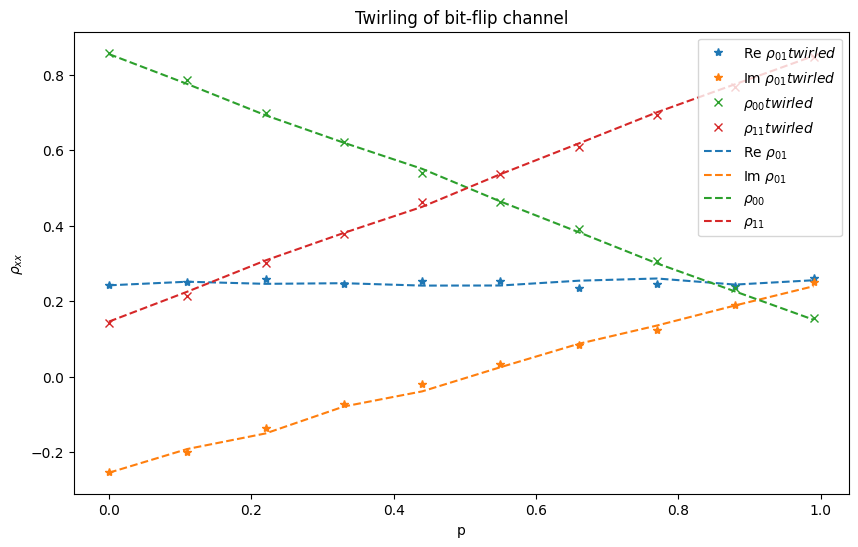

In [5]:
rhos_bf_twirled = []
for p in p_values:
    qc = QuantumCircuit(4)
    # Append the noise channel explicitly to the circuit
    error = pauli_error([("I", 1-p), ("X", p)])
    qc.append(error, [0])
    res_t = TwirledStateTomography(qc, qc_s, [0], measurement_indices=[0]).run(backend=backend).block_for_results()
    rhos_bf_twirled.append(res_t.analysis_results('state').value)

rhos_bf = []
for p in p_values:
    qc = qc_s.copy()
    error = pauli_error([("I", 1-p), ("X", p)])
    qc.append(error, [0])
    res = StateTomography(qc, measurement_indices=[0]).run(backend=backend, shots=4096).block_for_results()
    rhos_bf.append(res.analysis_results('state').value)

tomo_rhos_bf_twirled = np.zeros((2,2,len(p_values)), dtype=complex)

for (i, res) in enumerate(rhos_bf_twirled):
    tomo_rhos_bf_twirled[:,:,i] = res

tomo_rhos_bf = np.zeros((2,2,len(p_values)), dtype=complex)

for (i, res) in enumerate(rhos_bf):
    tomo_rhos_bf[:,:,i] = res

plt.figure(figsize=(10,6))

# Twirled results
plt.plot(p_values, np.real(tomo_rhos_bf_twirled[0,1,:]),"C0*", label='Re $\\rho_{01} twirled$')
plt.plot(p_values, np.imag(tomo_rhos_bf_twirled[0,1,:]),"C1*", label='Im $\\rho_{01} twirled$')
plt.plot(p_values, np.real(tomo_rhos_bf_twirled[0,0,:]),"C2x", label='$\\rho_{00} twirled$')
plt.plot(p_values, np.real(tomo_rhos_bf_twirled[1,1,:]),"C3x", label='$\\rho_{11} twirled$')

# Non-twirled results
plt.plot(p_values, np.real(tomo_rhos_bf[0,1,:]),"C0--", label='Re $\\rho_{01}$')
plt.plot(p_values, np.imag(tomo_rhos_bf[0,1,:]),"C1--", label='Im $\\rho_{01}$')
plt.plot(p_values, np.real(tomo_rhos_bf[0,0,:]),"C2--", label='$\\rho_{00}$')
plt.plot(p_values, np.real(tomo_rhos_bf[1,1,:]),"C3--", label='$\\rho_{11}$')

plt.xlabel('p')
plt.ylabel('$\\rho_{xx}$')
plt.legend()

plt.title("Twirling of bit-flip channel")

We see that twirling doesn't change the action of the bit-flip channel. Next, let us do the same for the coherent rotation.

Text(0.5, 1.0, 'Twirling of coherent rotation')

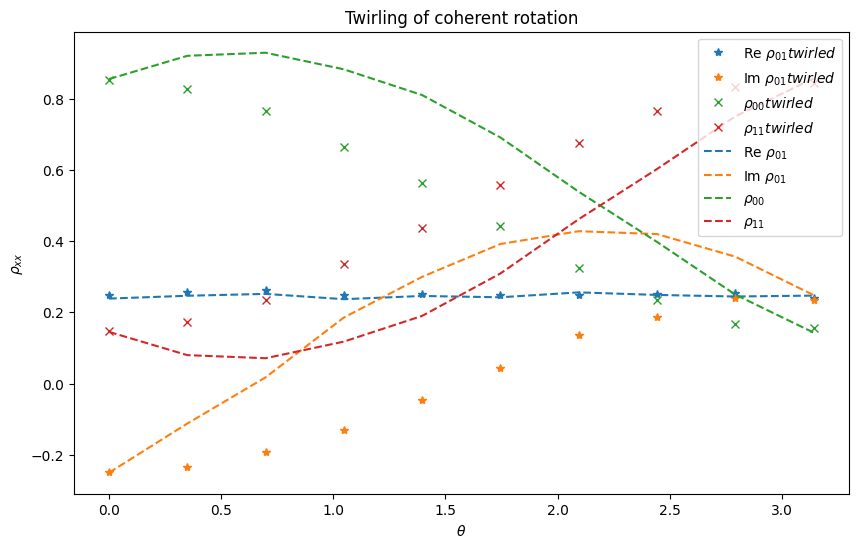

In [6]:
rhos_cr_twirled = []
for t in t_values:
    qc = QuantumCircuit(4,1)
    qc.rx(t,0)
    res_t = TwirledStateTomography(qc, qc_s, [0], measurement_indices=[0]).run(backend=backend).block_for_results()
    rhos_cr_twirled.append(res_t.analysis_results('state').value)

rhos_cr = []
for t in t_values:
    qc = qc_s.copy()
    qc.rx(t,0)
    res = StateTomography(qc, measurement_indices=[0]).run(backend=backend, shots=4096).block_for_results()
    rhos_cr.append(res.analysis_results('state').value)

tomo_rhos_cr_twirled = np.zeros((2,2,len(t_values)), dtype=complex)

for (i, res) in enumerate(rhos_cr_twirled):
    tomo_rhos_cr_twirled[:,:,i] = res

tomo_rhos_cr = np.zeros((2,2,len(t_values)), dtype=complex)

for (i, res) in enumerate(rhos_cr):
    tomo_rhos_cr[:,:,i] = res

plt.figure(figsize=(10,6))

# Twirled results
plt.plot(t_values, np.real(tomo_rhos_cr_twirled[0,1,:]),"C0*", label='Re $\\rho_{01} twirled$')
plt.plot(t_values, np.imag(tomo_rhos_cr_twirled[0,1,:]),"C1*", label='Im $\\rho_{01} twirled$')
plt.plot(t_values, np.real(tomo_rhos_cr_twirled[0,0,:]),"C2x", label='$\\rho_{00} twirled$')
plt.plot(t_values, np.real(tomo_rhos_cr_twirled[1,1,:]),"C3x", label='$\\rho_{11} twirled$')

# Non-twirled results
plt.plot(t_values, np.real(tomo_rhos_cr[0,1,:]),"C0--", label='Re $\\rho_{01}$')
plt.plot(t_values, np.imag(tomo_rhos_cr[0,1,:]),"C1--", label='Im $\\rho_{01}$')
plt.plot(t_values, np.real(tomo_rhos_cr[0,0,:]),"C2--", label='$\\rho_{00}$')
plt.plot(t_values, np.real(tomo_rhos_cr[1,1,:]),"C3--", label='$\\rho_{11}$')

plt.xlabel(r'$\theta$')
plt.ylabel('$\\rho_{xx}$')
plt.legend()

plt.title("Twirling of coherent rotation")

Twirling changes the phase of the diagonals and the imaginary component of the off-diagonal with respect to $\theta$. Finally, we perform this on the amplitude damping channel.

Text(0.5, 1.0, 'Twirling of amplitude damping channel')

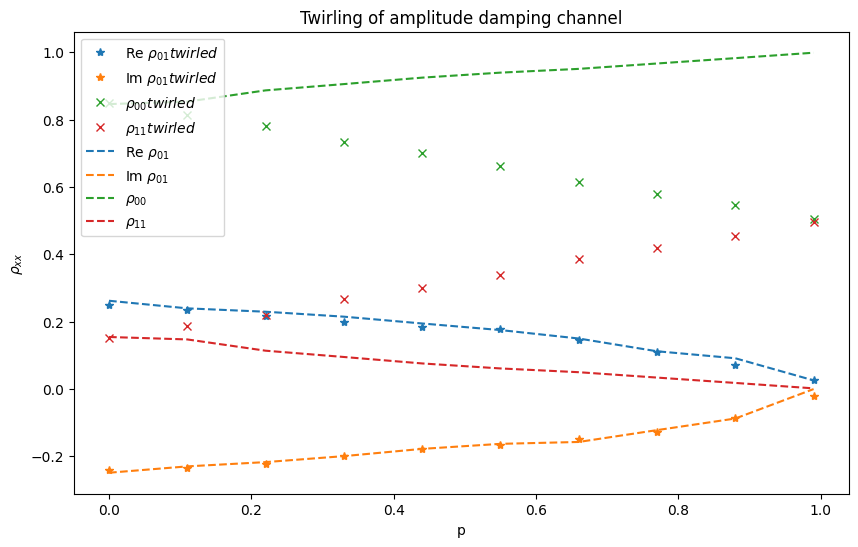

In [7]:
rhos_ad_twirled = []
for p in p_values:
    qc = QuantumCircuit(4)
    error = amplitude_damping_error(p)
    qc.append(error, [0])
    res_t = TwirledStateTomography(qc, qc_s, [0], measurement_indices=[0]).run(backend=backend).block_for_results()
    rhos_ad_twirled.append(res_t.analysis_results('state').value)

rhos_ad = []
for p in p_values:
    qc = qc_s.copy()
    error = amplitude_damping_error(p)
    qc.append(error, [0])
    res = StateTomography(qc, measurement_indices=[0]).run(backend=backend, shots=4096).block_for_results()
    rhos_ad.append(res.analysis_results('state').value)

tomo_rhos_ad_twirled = np.zeros((2,2,len(p_values)), dtype=complex)

for (i, res) in enumerate(rhos_ad_twirled):
    tomo_rhos_ad_twirled[:,:,i] = res

tomo_rhos_ad = np.zeros((2,2,len(p_values)), dtype=complex)

for (i, res) in enumerate(rhos_ad):
    tomo_rhos_ad[:,:,i] = res

plt.figure(figsize=(10,6))

# Twirled results
plt.plot(p_values, np.real(tomo_rhos_ad_twirled[0,1,:]),"C0*", label='Re $\\rho_{01} twirled$')
plt.plot(p_values, np.imag(tomo_rhos_ad_twirled[0,1,:]),"C1*", label='Im $\\rho_{01} twirled$')
plt.plot(p_values, np.real(tomo_rhos_ad_twirled[0,0,:]),"C2x", label='$\\rho_{00} twirled$')
plt.plot(p_values, np.real(tomo_rhos_ad_twirled[1,1,:]),"C3x", label='$\\rho_{11} twirled$')

# Non-twirled results
plt.plot(p_values, np.real(tomo_rhos_ad[0,1,:]),"C0--", label='Re $\\rho_{01}$')
plt.plot(p_values, np.imag(tomo_rhos_ad[0,1,:]),"C1--", label='Im $\\rho_{01}$')
plt.plot(p_values, np.real(tomo_rhos_ad[0,0,:]),"C2--", label='$\\rho_{00}$')
plt.plot(p_values, np.real(tomo_rhos_ad[1,1,:]),"C3--", label='$\\rho_{11}$')

plt.xlabel('p')
plt.ylabel('$\\rho_{xx}$')
plt.legend()

plt.title("Twirling of amplitude damping channel")

When twirling the amplitude damping channel, we can see that the density matrix approaches the identity matrix similar to the depolarizing channel.

### Task 4 (7p)
Finally, let us invert or mitigate the twirled noise channels to extract the noiseless density matrix. After twirling, the noise channel should be in the form of a Pauli channel, which is relatively easy to invert if the noise coefficients are known. The inverted channel is not guaranteed to be a physical channel, as the coefficients may be negative. The procedure to invert common noise channels is described in [S. Mangini, et al. EPJ Quantum Technol. 9, 29 (2022)](https://doi.org/10.1140/epjqt/s40507-022-00151-0).

The inverse of a general Pauli channel with coefficients $(p_{0}, p_{x}, p_{y}, p_{z})$ is found to be
$$\begin{aligned} & \Lambda^{-1}_{\boldsymbol{p}}(\Lambda) = \beta _{0} \Lambda + \beta _{1} \sigma _{x} {\Lambda} \sigma _{x} + \beta _{2} \sigma _{y} {\Lambda} \sigma _{y} + \beta _{3} \sigma _{z} {\Lambda} \sigma _{z}\quad \text{with} \\ & \beta _{0} =\frac{1}{4} \biggl(1+\frac{1}{1-2(p_{x}+p_{y})}+ \frac{1}{1-2(p_{x}+p_{z})}+\frac{1}{1-2(p_{y}+p_{z})} \biggr), \\ & \beta _{1} = \frac{1}{4} \biggl(1-\frac{1}{1-2(p_{x}+p_{y})}- \frac{1}{1-2(p_{x}+p_{z})}+\frac{1}{1-2(p_{y}+p_{z})} \biggr), \\ & \beta _{2} = \frac{1}{4} \biggl(1-\frac{1}{1-2(p_{x}+p_{y})}+ \frac{1}{1-2(p_{x}+p_{z})}-\frac{1}{1-2(p_{y}+p_{z})} \biggr), \\ & \beta _{3} = \frac{1}{4} \biggl(1+\frac{1}{1\red{-}2(p_{x}+p_{y})}- \frac{1}{1-2(p_{x}+p_{z})}-\frac{1}{1-2(p_{y}+p_{z})} \biggr) . \end{aligned}$$

Using the coefficients of the twirled noise channels from Task 1, invert each of the density matrices you found in Task 3 (for each $p$ and $\theta$) and compare $\rho_{00}$, $\rho_{11}$, $Re(\rho_{01})$, $Im(\rho_{01})$ to the non-inverted ones in e.g. a plot.

Hint: The expressions simplify a lot if you substitute the coefficients from Task 1.

#### Solution

In [3]:
import numpy as np
from qiskit.quantum_info import Pauli

I, X, Y, Z = (Pauli(pauli).to_matrix() for pauli in ['I', 'X', 'Y', 'Z'])

Text(0.5, 1.0, 'Inversion of bit-flip channel')

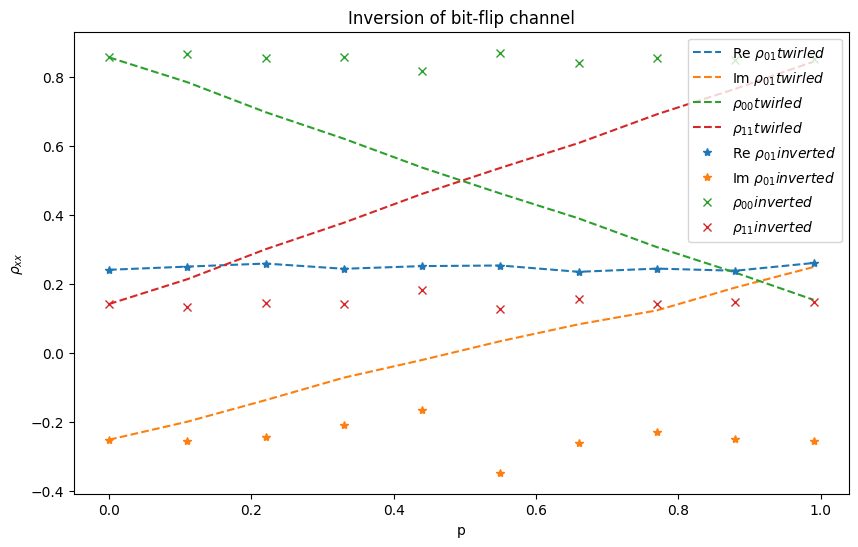

In [9]:
rhos_bf_inverted = []

for p, rho in zip(p_values, rhos_bf_twirled):
    # the inversion coefficients
    q0 = 1/2*(1+1/(1-2*p))
    q1 = 1/2*(1-1/(1-2*p))
    q2 = 0
    q3 = 0

    mit_rho = np.zeros((2,2), dtype=complex)
    for q, P in zip([q0,q1,q2,q3], [I, X, Y, Z]):
        mit_rho += q * P @ rho.data @ P

    rhos_bf_inverted.append(mit_rho)

tomo_rhos_bf_twirled = np.zeros((2,2,len(p_values)), dtype=complex)

for (i, res) in enumerate(rhos_bf_twirled):
    tomo_rhos_bf_twirled[:,:,i] = res

tomo_rhos_bf_inverted = np.zeros((2,2,len(p_values)), dtype=complex)

for (i, res) in enumerate(rhos_bf_inverted):
    tomo_rhos_bf_inverted[:,:,i] = res

plt.figure(figsize=(10,6))

# Twirled results
plt.plot(p_values, np.real(tomo_rhos_bf_twirled[0,1,:]),"C0--", label='Re $\\rho_{01} twirled$')
plt.plot(p_values, np.imag(tomo_rhos_bf_twirled[0,1,:]),"C1--", label='Im $\\rho_{01} twirled$')
plt.plot(p_values, np.real(tomo_rhos_bf_twirled[0,0,:]),"C2--", label='$\\rho_{00} twirled$')
plt.plot(p_values, np.real(tomo_rhos_bf_twirled[1,1,:]),"C3--", label='$\\rho_{11} twirled$')

# Non-twirled results
plt.plot(p_values, np.real(tomo_rhos_bf_inverted[0,1,:]),"C0*", label='Re $\\rho_{01} inverted$')
plt.plot(p_values, np.imag(tomo_rhos_bf_inverted[0,1,:]),"C1*", label='Im $\\rho_{01} inverted$')
plt.plot(p_values, np.real(tomo_rhos_bf_inverted[0,0,:]),"C2x", label='$\\rho_{00} inverted$')
plt.plot(p_values, np.real(tomo_rhos_bf_inverted[1,1,:]),"C3x", label='$\\rho_{11} inverted$')

plt.xlabel('p')
plt.ylabel('$\\rho_{xx}$')
plt.legend()

plt.title("Inversion of bit-flip channel")

Text(0.5, 1.0, 'Inversion of coherent rotation')

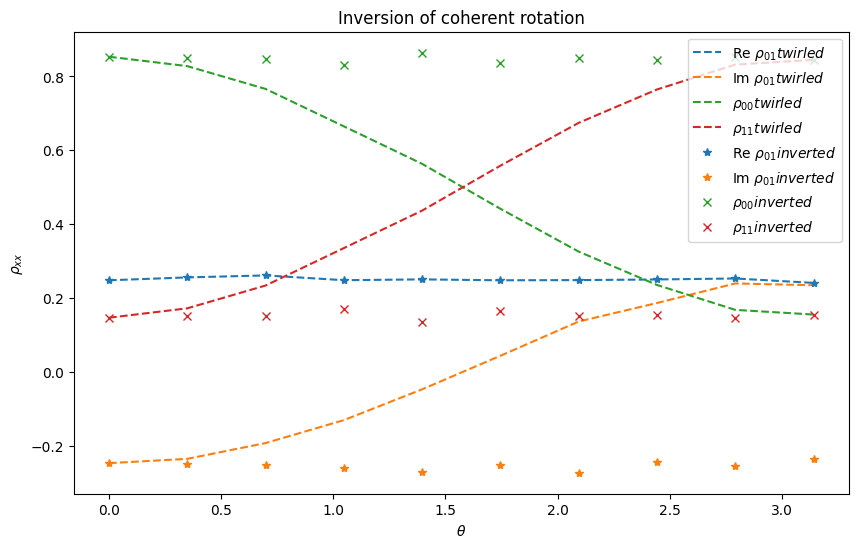

In [10]:
rhos_cr_inverted = []

for t, rho in zip(t_values, rhos_cr_twirled):
    # the inversion coefficients
    q0 = 1/2*(1+1/(1-2*np.sin(t/2)**2))
    q1 = 1/2*(1-1/(1-2*np.sin(t/2)**2))
    q2 = 0
    q3 = 0

    mit_rho = np.zeros((2,2), dtype=complex)
    for q, P in zip([q0,q1,q2,q3], [I, X, Y, Z]):
        mit_rho += q * P @ rho.data @ P

    rhos_cr_inverted.append(mit_rho)

tomo_rhos_cr_twirled = np.zeros((2,2,len(p_values)), dtype=complex)

for (i, res) in enumerate(rhos_cr_twirled):
    tomo_rhos_cr_twirled[:,:,i] = res

tomo_rhos_cr_inverted = np.zeros((2,2,len(p_values)), dtype=complex)

for (i, res) in enumerate(rhos_cr_inverted):
    tomo_rhos_cr_inverted[:,:,i] = res

plt.figure(figsize=(10,6))

# Twirled results
plt.plot(t_values, np.real(tomo_rhos_cr_twirled[0,1,:]),"C0--", label='Re $\\rho_{01} twirled$')
plt.plot(t_values, np.imag(tomo_rhos_cr_twirled[0,1,:]),"C1--", label='Im $\\rho_{01} twirled$')
plt.plot(t_values, np.real(tomo_rhos_cr_twirled[0,0,:]),"C2--", label='$\\rho_{00} twirled$')
plt.plot(t_values, np.real(tomo_rhos_cr_twirled[1,1,:]),"C3--", label='$\\rho_{11} twirled$')

# Non-twirled results
plt.plot(t_values, np.real(tomo_rhos_cr_inverted[0,1,:]),"C0*", label='Re $\\rho_{01} inverted$')
plt.plot(t_values, np.imag(tomo_rhos_cr_inverted[0,1,:]),"C1*", label='Im $\\rho_{01} inverted$')
plt.plot(t_values, np.real(tomo_rhos_cr_inverted[0,0,:]),"C2x", label='$\\rho_{00} inverted$')
plt.plot(t_values, np.real(tomo_rhos_cr_inverted[1,1,:]),"C3x", label='$\\rho_{11} inverted$')

plt.xlabel(r'$\theta$')
plt.ylabel('$\\rho_{xx}$')
plt.legend()

plt.title("Inversion of coherent rotation")

Text(0.5, 1.0, 'Inversion of amplitude damping channel')

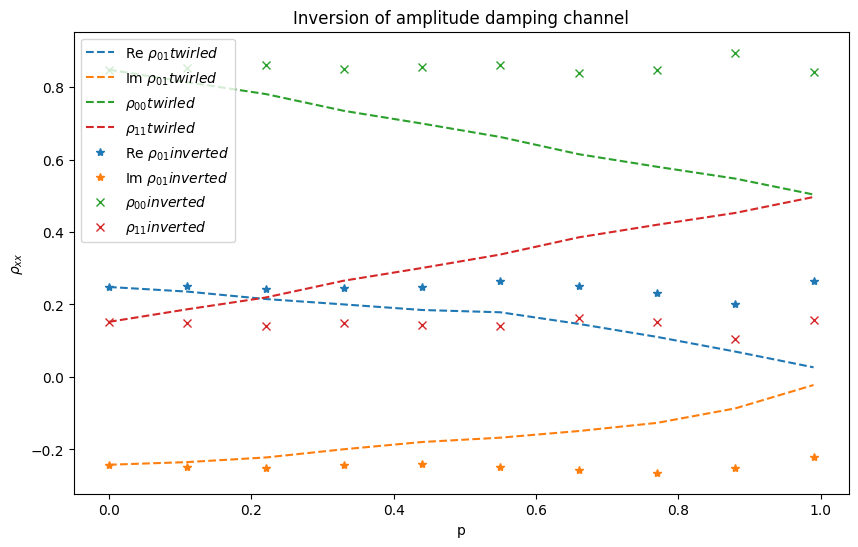

In [12]:
rhos_ad_inverted = []

for p, rho in zip(p_values, rhos_ad_twirled):
    # the inversion coefficients
    q0 = 1/4*(1+1/np.sqrt(1-p))**2
    q1 = 1/4*(1-1/(1-p))
    q2 = 1/4*(1-1/(1-p))
    q3 = 1/4*(1-1/np.sqrt(1-p))**2

    mit_rho = np.zeros((2,2), dtype=complex)
    for q, P in zip([q0,q1,q2,q3], [I, X, Y, Z]):
        mit_rho += q * P @ rho.data @ P

    rhos_ad_inverted.append(mit_rho)

tomo_rhos_ad_twirled = np.zeros((2,2,len(p_values)), dtype=complex)

for (i, res) in enumerate(rhos_ad_twirled):
    tomo_rhos_ad_twirled[:,:,i] = res

tomo_rhos_ad_inverted = np.zeros((2,2,len(p_values)), dtype=complex)

for (i, res) in enumerate(rhos_ad_inverted):
    tomo_rhos_ad_inverted[:,:,i] = res

plt.figure(figsize=(10,6))

# Twirled results
plt.plot(p_values, np.real(tomo_rhos_ad_twirled[0,1,:]),"C0--", label='Re $\\rho_{01} twirled$')
plt.plot(p_values, np.imag(tomo_rhos_ad_twirled[0,1,:]),"C1--", label='Im $\\rho_{01} twirled$')
plt.plot(p_values, np.real(tomo_rhos_ad_twirled[0,0,:]),"C2--", label='$\\rho_{00} twirled$')
plt.plot(p_values, np.real(tomo_rhos_ad_twirled[1,1,:]),"C3--", label='$\\rho_{11} twirled$')

# Non-twirled results
plt.plot(p_values, np.real(tomo_rhos_ad_inverted[0,1,:]),"C0*", label='Re $\\rho_{01} inverted$')
plt.plot(p_values, np.imag(tomo_rhos_ad_inverted[0,1,:]),"C1*", label='Im $\\rho_{01} inverted$')
plt.plot(p_values, np.real(tomo_rhos_ad_inverted[0,0,:]),"C2x", label='$\\rho_{00} inverted$')
plt.plot(p_values, np.real(tomo_rhos_ad_inverted[1,1,:]),"C3x", label='$\\rho_{11} inverted$')

plt.xlabel('p')
plt.ylabel('$\\rho_{xx}$')
plt.legend()

plt.title("Inversion of amplitude damping channel")

We can see that for all noise channels we are able to invert them so that we recover the noiseless density matrix. This can only be done in this relatively easy way if the noise channel is in Pauli channel form, which for a general noise channel can be obtained after twirling it. By finding the noise coefficients of the noise in a real quantum device, one can invert even the noise there! Finding these coefficients can be challenging however and this problem is known as noise characterization or noise learning. In practice one wants to invert the noise for circuits applied over many qubits specifically on the noisy CNOT gates. Many of the same principles can be applied for such a case, however the technical details are naturally more complicated. Inverting the noise in the middle of a circuit, for example, requires additional techniques such as [probabilistic error cancellation](https://www.nature.com/articles/s41567-023-02042-2).  